DATA CLEANING:


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/BA_reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2100 non-null   int64 
 1   reviews     2100 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df

,reviews
0,Not Verified | We bought tickets for a Geneva-...
1,✅ Trip Verified | Appalling service with fai...
2,✅ Trip Verified | British Airways charge you f...
3,✅ Trip Verified | What is wrong with you guys?...
4,✅ Trip Verified | We booked two business cla...
...,...
2095,✅ Verified Review | Dubai to Toronto via Lond...
2096,✅ Verified Review | London Heathrow to Copenha...
2097,✅ Verified Review | London Gatwick to Antigua...
2098,✅ Verified Review | Kiev to Belfast via Londo...


In [ ]:
# prompt: I need to seperate the review column into 2 based on delimiter | befre taht we have review that should be in seperate column and after | this should be sperate column

df[['Review','Cus_Review']] = df['reviews'].str.split('|',expand=True)
df

,reviews,Review,Cus_Review
0,Not Verified | We bought tickets for a Geneva-...,Not Verified,"We bought tickets for a Geneva-London flight,..."
1,✅ Trip Verified | Appalling service with fai...,✅ Trip Verified,Appalling service with failing defective fl...
2,✅ Trip Verified | British Airways charge you f...,✅ Trip Verified,British Airways charge you for the pleasure o...
3,✅ Trip Verified | What is wrong with you guys?...,✅ Trip Verified,What is wrong with you guys? People pay lots ...
4,✅ Trip Verified | We booked two business cla...,✅ Trip Verified,We booked two business class seat with Brit...
...,...,...,...
2095,✅ Verified Review | Dubai to Toronto via Lond...,✅ Verified Review,"Dubai to Toronto via London, and I tried to ..."
2096,✅ Verified Review | London Heathrow to Copenha...,✅ Verified Review,London Heathrow to Copenhagen. After many hor...
2097,✅ Verified Review | London Gatwick to Antigua...,✅ Verified Review,London Gatwick to Antigua return. The charge...
2098,✅ Verified Review | Kiev to Belfast via Londo...,✅ Verified Review,Kiev to Belfast via London Heathrow. My last...


In [ ]:
df["Review"].unique()

array(['Not Verified ', '✅ Trip Verified ', 'cNot Verified ',
       '❎ Not Verified ',
       'Two regular an uneventful flights. Curiously enough, though, with the exact same crew! The crew were very nice and the service is very attentive and polite, but I just cannot take it that British Airways has chosen to provide a service just like low cost carriers, where everything is charged for, apart from luggage. On the second leg of the trip, the aircraft felt extremely warm and for some odd reason, row 6 where I was sitting did not have AC.',
       '✅ Verified Review ', '❎ Unverified ',
       'Flew London Gatwick to Tampa with British Airways. Gatwick is a modern airport, but check-in was slow as was security. In the departure hall plenty of places to eat and shop. Gate shown about an hour before departure. Waited for 30-45 mins at gate as plane was delayed by about 20 minutes. Boarding took a very long time as it was a full flight. Once on board the aircraft we departed quickly.The s

In [ ]:
df.drop("Review",axis=1,inplace=True)

In [ ]:
df.drop("reviews",axis=1,inplace=True)

In [ ]:
df[df["Cus_Review"].isna()]

,Cus_Review
1446,None
2087,None
2091,None


In [ ]:
df.drop(df[df["Cus_Review"].isna()].index,axis=0,inplace=True)

In [ ]:
df[df["Cus_Review"].isna()]

,Cus_Review


In [ ]:
df['Cus_Review']=df['Cus_Review'].astype(str)
def tokenize_text(reviewText):
    return reviewText.split()
df['Cus_Review']=df['Cus_Review'].apply(tokenize_text)
df['Cus_Review']

,Cus_Review
0,"[We, bought, tickets, for, a, Geneva-London, f..."
1,"[Appalling, service, with, failing, defective,..."
2,"[British, Airways, charge, you, for, the, plea..."
3,"[What, is, wrong, with, you, guys?, People, pa..."
4,"[We, booked, two, business, class, seat, with,..."
...,...
2095,"[Dubai, to, Toronto, via, London,, and, I, tri..."
2096,"[London, Heathrow, to, Copenhagen., After, man..."
2097,"[London, Gatwick, to, Antigua, return., The, c..."
2098,"[Kiev, to, Belfast, via, London, Heathrow., My..."


In [ ]:
import re
df['Cus_Review']=df['Cus_Review'].astype(str)
def remove_numeric_values(reviewText):
    return re.sub(r'\d+','',reviewText)
df['Cus_Review']=df['Cus_Review'].apply(remove_numeric_values)
df['Cus_Review']

,Cus_Review
0,"['We', 'bought', 'tickets', 'for', 'a', 'Genev..."
1,"['Appalling', 'service', 'with', 'failing', 'd..."
2,"['British', 'Airways', 'charge', 'you', 'for',..."
3,"['What', 'is', 'wrong', 'with', 'you', 'guys?'..."
4,"['We', 'booked', 'two', 'business', 'class', '..."
...,...
2095,"['Dubai', 'to', 'Toronto', 'via', 'London,', '..."
2096,"['London', 'Heathrow', 'to', 'Copenhagen.', 'A..."
2097,"['London', 'Gatwick', 'to', 'Antigua', 'return..."
2098,"['Kiev', 'to', 'Belfast', 'via', 'London', 'He..."


In [ ]:
def remove_short_words(reviewText,min_word_length=3):
    return re.sub(r'\b\w{1,'+str(min_word_length-1)+r'}\b','',reviewText)
df['Cus_Review']=df['Cus_Review'].apply(remove_short_words)
df['Cus_Review']

,Cus_Review
0,"['', 'bought', 'tickets', 'for', '', 'Geneva-L..."
1,"['Appalling', 'service', 'with', 'failing', 'd..."
2,"['British', 'Airways', 'charge', 'you', 'for',..."
3,"['What', '', 'wrong', 'with', 'you', 'guys?', ..."
4,"['', 'booked', 'two', 'business', 'class', 'se..."
...,...
2095,"['Dubai', '', 'Toronto', 'via', 'London,', 'an..."
2096,"['London', 'Heathrow', '', 'Copenhagen.', 'Aft..."
2097,"['London', 'Gatwick', '', 'Antigua', 'return.'..."
2098,"['Kiev', '', 'Belfast', 'via', 'London', 'Heat..."


In [ ]:
def remove_url(reviewText):
    return re.sub(r'&\S#\Shttps\S+','',reviewText)
df['Cus_Review']=df['Cus_Review'].apply(remove_url)
df['Cus_Review']

,Cus_Review
0,"['', 'bought', 'tickets', 'for', '', 'Geneva-L..."
1,"['Appalling', 'service', 'with', 'failing', 'd..."
2,"['British', 'Airways', 'charge', 'you', 'for',..."
3,"['What', '', 'wrong', 'with', 'you', 'guys?', ..."
4,"['', 'booked', 'two', 'business', 'class', 'se..."
...,...
2095,"['Dubai', '', 'Toronto', 'via', 'London,', 'an..."
2096,"['London', 'Heathrow', '', 'Copenhagen.', 'Aft..."
2097,"['London', 'Gatwick', '', 'Antigua', 'return.'..."
2098,"['Kiev', '', 'Belfast', 'via', 'London', 'Heat..."


In [ ]:
def remove_spl_chars1(reviewText):
    return re.sub(r'&#;&#;','',reviewText)
def remove_spl_chars2(reviewText):
    return re.sub(r" '\",' ",'',reviewText)
def remove_empty_spaces(reviewText):
    return reviewText.strip('')
df['Cus_Review']=df['Cus_Review'].apply(remove_spl_chars1)
df['Cus_Review']=df['Cus_Review'].apply(remove_spl_chars2)
df['Cus_Review']=df['Cus_Review'].apply(remove_empty_spaces)
df['Cus_Review']

,Cus_Review
0,"['', 'bought', 'tickets', 'for', '', 'Geneva-L..."
1,"['Appalling', 'service', 'with', 'failing', 'd..."
2,"['British', 'Airways', 'charge', 'you', 'for',..."
3,"['What', '', 'wrong', 'with', 'you', 'guys?', ..."
4,"['', 'booked', 'two', 'business', 'class', 'se..."
...,...
2095,"['Dubai', '', 'Toronto', 'via', 'London,', 'an..."
2096,"['London', 'Heathrow', '', 'Copenhagen.', 'Aft..."
2097,"['London', 'Gatwick', '', 'Antigua', 'return.'..."
2098,"['Kiev', '', 'Belfast', 'via', 'London', 'Heat..."


In [ ]:
df['Cus_Review'] = df['Cus_Review'].str.lower()
df['Cus_Review']

,Cus_Review
0,"['', 'bought', 'tickets', 'for', '', 'geneva-l..."
1,"['appalling', 'service', 'with', 'failing', 'd..."
2,"['british', 'airways', 'charge', 'you', 'for',..."
3,"['what', '', 'wrong', 'with', 'you', 'guys?', ..."
4,"['', 'booked', 'two', 'business', 'class', 'se..."
...,...
2095,"['dubai', '', 'toronto', 'via', 'london,', 'an..."
2096,"['london', 'heathrow', '', 'copenhagen.', 'aft..."
2097,"['london', 'gatwick', '', 'antigua', 'return.'..."
2098,"['kiev', '', 'belfast', 'via', 'london', 'heat..."


In [ ]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
df['Cus_Review'] = df['Cus_Review'].apply(remove_punctuation)
df['Cus_Review']

,Cus_Review
0,bought tickets for genevalondon flight but w...
1,appalling service with failing defective fleet...
2,british airways charge you for the pleasure c...
3,what wrong with you guys people pay lots mon...
4,booked two business class seat with british a...
...,...
2095,dubai toronto via london and tried check on...
2096,london heathrow copenhagen after many horribl...
2097,london gatwick antigua return the charge res...
2098,kiev belfast via london heathrow last two fl...


In [ ]:
# prompt: i have claend the data but still Cus_review is in text i need to do sentiment analysis by addind one more column based on customer review like paositve or negative

!pip install textblob

from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['Sentiment'] = df['Cus_Review'].apply(analyze_sentiment)

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Cus_Review'].apply(analyze_sentiment_vader)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

# Load pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis', device=0)  # Assuming you have GPU

# Function to analyze sentiment with truncation
def analyze_sentiment_batch(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        # Truncation ensures no text is longer than 512 tokens
        truncated_batch = [text[:512] for text in batch]  # Limit text to first 512 characters
        results.extend(sentiment_pipeline(truncated_batch))  # Apply sentiment analysis in batches
    return [res['label'].lower() for res in results]

# Apply the sentiment analysis to the DataFrame
df['Sentiment'] = analyze_sentiment_batch(df['Cus_Review'].tolist())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df.head()

,Cus_Review,Sentiment
0,bought tickets for genevalondon flight but w...,negative
1,appalling service with failing defective fleet...,negative
2,british airways charge you for the pleasure c...,negative
3,what wrong with you guys people pay lots mon...,negative
4,booked two business class seat with british a...,negative


In [ ]:
df["Sentiment"].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Vectorizing the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cus_Review'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.3, random_state=42)

# Training the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Making predictions and checking accuracy
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'SVM Accuracy: {accuracy}')


SVM Accuracy: 0.8714285714285714


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_
predictions = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Tuned Logistic Regression Accuracy: {accuracy}')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..................................C=1, s

In [37]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Train XGBoost classifier
xgb = XGBClassifier()

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to your training data and transform it
y_train_encoded = le.fit_transform(y_train)

# Fit the XGBoost classifier using the encoded target variable
xgb.fit(X_train, y_train_encoded)

# Predictions and accuracy
# Transform the test data labels before prediction
predictions = xgb.predict(X_test)
predictions_decoded = le.inverse_transform(predictions)  # Decode predictions back to original labels

accuracy = accuracy_score(y_test, predictions_decoded)
print(f'XGBoost Accuracy: {accuracy}')

XGBoost Accuracy: 0.8746031746031746


In [39]:
# prompt: giv eme code for logistice regression do hyperparameter tunning for best accuray and also give code for classification report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']} # Extended parameter grid
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2) # Increased max_iter
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_
predictions = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Tuned Logistic Regression Accuracy: {accuracy}')

# Classification Report
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   4.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.6s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   6.9s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.1s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
Tuned Logistic Regression Accuracy: 0.8809523809523809
              precision    recall  f1-score   support


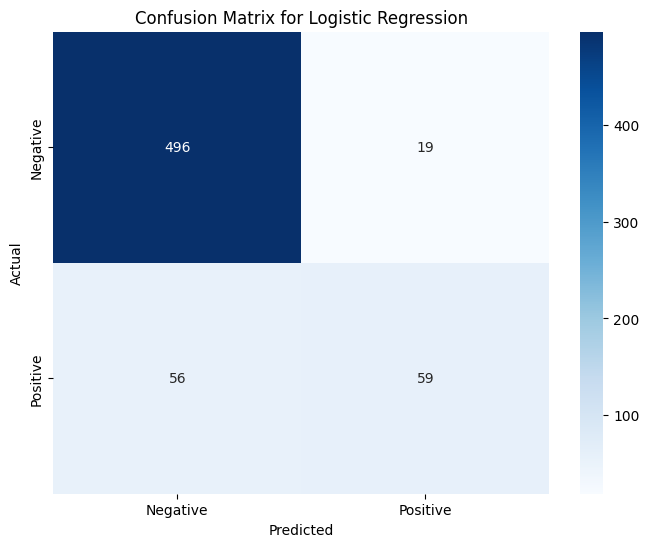

In [43]:
# prompt: give confusion matrix plot for above  LR have only 2 vaues psitve and negative

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'predictions' and 'y_test' are defined from the Logistic Regression part
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive']) # Assuming binary classification
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

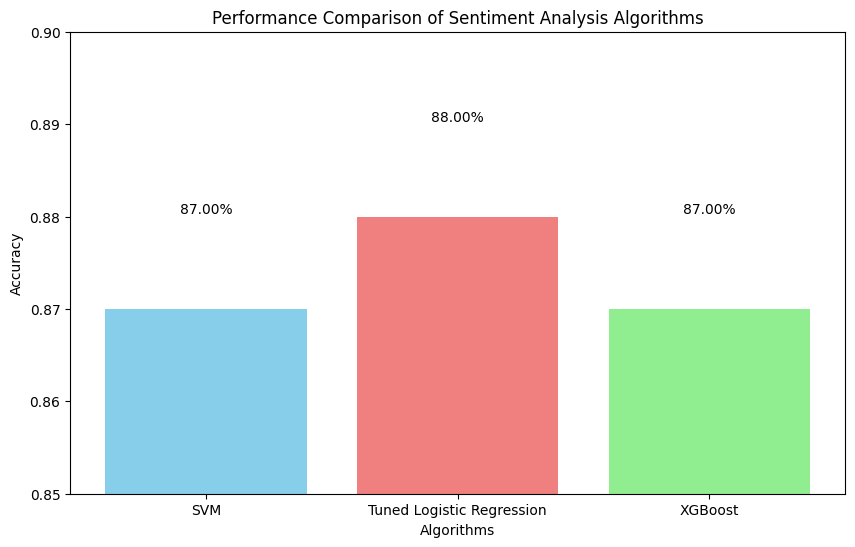

In [47]:
# prompt: Performance Bar Chart label all percent but aacuracy differs for allalgos see above ouptu for all algos svm-0.8714285714285714,tuned logusin grid 88 and XGBClassifier 87

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual values)
accuracy_scores = {
    'SVM': 0.87,
    'Tuned Logistic Regression': 0.88,
    'XGBoost': 0.87
}

# Algorithm names and their corresponding accuracy scores
algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, scores, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add percentage labels on top of each bar
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.2%}', ha='center', va='bottom')

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Sentiment Analysis Algorithms')
plt.ylim(0.85, 0.9)  # Adjust y-axis limits for better visualization
plt.show()

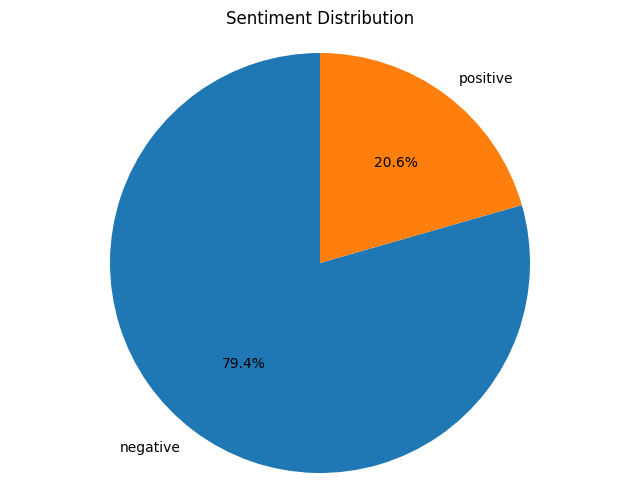

In [48]:
# prompt: Sentiment Distribution Chart:

# Assuming 'df' and 'predictions' from the previous code are available

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [49]:
# prompt: do under samoling for the above

# Assuming 'df' and 'predictions' from the previous code are available

# Undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target variable (y)
X = df.drop('Sentiment', axis=1)  # Assuming 'Sentiment' is your target variable
y = df['Sentiment']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Sentiment'] = y_resampled

# Now you have a balanced dataset in 'df_resampled'

# You can then continue with the rest of your code using df_resampled
# For example, re-vectorize the text data:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_resampled['Cus_Review'])

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, df_resampled['Sentiment'], test_size=0.3, random_state=42)

# ...and continue with training and evaluation

In [50]:
# prompt: giv eme code for logistice regression do hyperparameter tunning for best accuray and also give code for classification report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']} # Extended parameter grid
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2) # Increased max_iter
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_
predictions = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Tuned Logistic Regression Accuracy: {accuracy}')

# Classification Report
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   1.3s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   1.3s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   1.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ................C=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time=   2.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.1s
Tuned Logistic Regression Accuracy: 0.833976833976834
              precision    recall  f1-score   support



In [51]:
# Training the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Making predictions and checking accuracy
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'SVM Accuracy: {accuracy}')


SVM Accuracy: 0.8262548262548263


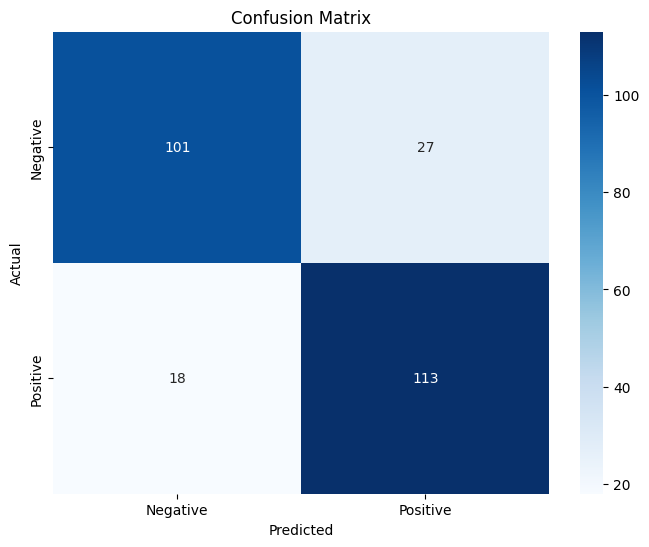

In [53]:
# prompt: give me cofusionmatix code for above only positve negative are there and i have done undersamling also i need code for that

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'predictions' and 'y_test' are defined from your model
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()